In [78]:
#import Important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB

In [79]:
# Read Dataset
train=pd.read_csv('train_tweets.csv')
test=pd.read_csv('test_tweets.csv')

 Here I will only use train Dataset

In [80]:

train.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [81]:
train.shape

(31962, 3)

In [82]:
train['label'].value_counts()

0    29720
1     2242
Name: label, dtype: int64

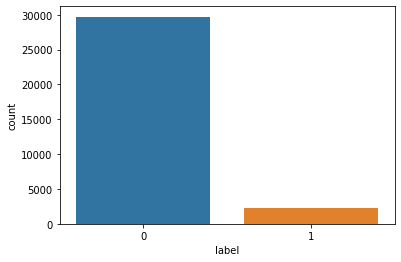

In [83]:
# look for Imabalanced Dataset
sns.countplot(train['label'])

In [84]:
# NLP libraries
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import re

In [85]:
# convert tweets into original form ( remove punctuations eg. # and @)
# remove stopwords (eg. the,her,him)
lm=WordNetLemmatizer()
corpus=[]
for i in range(0,len(train)):
    review=re.sub('[^a-zA-Z]',' ',train['tweet'][i])
    review=review.lower()
    review=review.split()
    review=[lm.lemmatize(word) for word in review if word not in stopwords.words('english')]
    review=' '.join(review)
    corpus.append(review)
    

In [86]:
from sklearn.feature_extraction.text import TfidfVectorizer 

In [87]:
# tweets covert into vectors by TF-IDF  
tfd=TfidfVectorizer(ngram_range=(1,3))
X_corpus=tfd.fit_transform(corpus)

In [88]:
#Oversampling for Imbalanced Data

from imblearn.over_sampling import RandomOverSampler
os=RandomOverSampler()
X,y=os.fit_sample(X_corpus,train['label'])

In [89]:
labels=pd.DataFrame(y,columns=['label'])

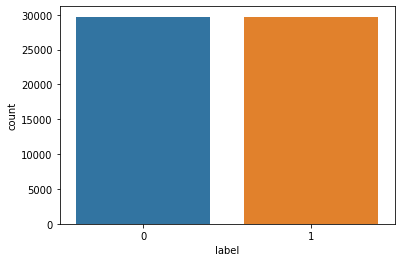

In [90]:
# we can see Balanced Data
sns.countplot(labels['label'])

In [91]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)


In [92]:
# use Multinomial Naive bayes model hypertuning by GridSearchCV
naive=MultinomialNB()

param_grid={ 'alpha':[0.01,0.05,0.1,0.5,1,5,10]}
grid=GridSearchCV(naive,param_grid=param_grid,cv=5,n_jobs=-1)

In [93]:
grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=MultinomialNB(alpha=1.0, class_prior=None,
                                     fit_prior=True),
             iid='deprecated', n_jobs=-1,
             param_grid={'alpha': [0.01, 0.05, 0.1, 0.5, 1, 5, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [94]:
print(grid.best_params_)
print(grid.best_score_)

{'alpha': 0.01}
0.982524439851095


In [95]:
# got 98% accuracy with parameter alpha=0.01
# train the Final model
naive=MultinomialNB(alpha=0.01)
naive.fit(X_train,y_train)
y_pred=naive.predict(X_test)

In [97]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
accuracy=accuracy_score(y_test,y_pred)

In [98]:
print(accuracy)

0.9855316285329744


In [99]:
matrix=confusion_matrix(y_test,y_pred)

In [100]:
matrix

array([[5816,  172],
       [   0, 5900]], dtype=int64)

In [102]:
report=classification_report(y_test,y_pred)

In [103]:
print(report)

              precision    recall  f1-score   support

           0       1.00      0.97      0.99      5988
           1       0.97      1.00      0.99      5900

    accuracy                           0.99     11888
   macro avg       0.99      0.99      0.99     11888
weighted avg       0.99      0.99      0.99     11888



In [104]:
naive.coef_

array([[-16.23615597, -16.23615597, -16.23615597, ..., -16.23615597,
        -16.23615597, -16.23615597]])

In [105]:
features=tfd.get_feature_names()

In [106]:
features

['aa',
 'aa recovery',
 'aa recovery sobriety',
 'aa suppoers',
 'aa suppoers dumpsterfire',
 'aaa',
 'aaa exam',
 'aaa exam college',
 'aaa studio',
 'aaa today',
 'aaa today last',
 'aaaaa',
 'aaaaa yes',
 'aaaaa yes yes',
 'aaaaaand',
 'aaaaaand come',
 'aaaaaand come take',
 'aaaaah',
 'aaaaah want',
 'aaaaah want know',
 'aaaaand',
 'aaaaand steph',
 'aaaaand steph still',
 'aaahh',
 'aaahh nabilah',
 'aaahh nabilah look',
 'aaahhhh',
 'aaahhhhh',
 'aaand',
 'aaand another',
 'aaand another lb',
 'aaawwwww',
 'aaawwwww cute',
 'aaberg',
 'aaberg elegy',
 'aaberg elegy melancholy',
 'aaberg elegy music',
 'aadityaji',
 'aadityaji wish',
 'aadityaji wish many',
 'aah',
 'aah daahling',
 'aah daahling george',
 'aakhri',
 'aakhri pal',
 'aakhri pal moment',
 'aal',
 'aalivyahsimon',
 'aalivyahsimon rabanal',
 'aalivyahsimon rabanal blessed',
 'aaliyah',
 'aaliyah seriously',
 'aaliyah seriously wish',
 'aamaadmipay',
 'aamaadmipay leader',
 'aamaadmipay leader acting',
 'aameer',
 'a

In [107]:
# Most Negative
sorted(zip(naive.coef_[0],features))[:20]

[(-16.236155974433643, 'aa'),
 (-16.236155974433643, 'aa recovery'),
 (-16.236155974433643, 'aa recovery sobriety'),
 (-16.236155974433643, 'aa suppoers'),
 (-16.236155974433643, 'aa suppoers dumpsterfire'),
 (-16.236155974433643, 'aaa'),
 (-16.236155974433643, 'aaa exam'),
 (-16.236155974433643, 'aaa exam college'),
 (-16.236155974433643, 'aaa studio'),
 (-16.236155974433643, 'aaa today'),
 (-16.236155974433643, 'aaa today last'),
 (-16.236155974433643, 'aaaaa'),
 (-16.236155974433643, 'aaaaa yes'),
 (-16.236155974433643, 'aaaaa yes yes'),
 (-16.236155974433643, 'aaaaaand'),
 (-16.236155974433643, 'aaaaaand come'),
 (-16.236155974433643, 'aaaaaand come take'),
 (-16.236155974433643, 'aaaaah'),
 (-16.236155974433643, 'aaaaah want'),
 (-16.236155974433643, 'aaaaah want know')]

In [108]:
# Most positive
sorted(zip(naive.coef_[0],features),reverse=True)[:20]

[(-4.767451223099903, 'user'),
 (-5.61401515788943, 'user user'),
 (-5.751690188911208, 'libtard'),
 (-5.989857822915501, 'amp'),
 (-6.014879471029325, 'trump'),
 (-6.283739013627163, 'black'),
 (-6.314787959456951, 'politics'),
 (-6.316556688744722, 'user user user'),
 (-6.325714658253939, 'white'),
 (-6.339052879746325, 'liberal'),
 (-6.365734964431986, 'racist'),
 (-6.42865872102879, 'sjw'),
 (-6.452649927852943, 'sjw liberal politics'),
 (-6.452649927852943, 'sjw liberal'),
 (-6.452649927852943, 'might libtard libtard'),
 (-6.452649927852943, 'might libtard'),
 (-6.452649927852943, 'libtard sjw liberal'),
 (-6.452649927852943, 'libtard sjw'),
 (-6.452649927852943, 'libtard libtard sjw'),
 (-6.452649927852943, 'libtard libtard')]